# Сжатие изображения без потери качества при помощи PCA

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy.stats import stats
from sklearn.decomposition import PCA

Загрузим картинку и нарисуем ее в монохромный формат

In [16]:
%%capture
!wget -O flower.png "https://www.dropbox.com/s/xoos0myk285efyu/flower.png?dl=0"

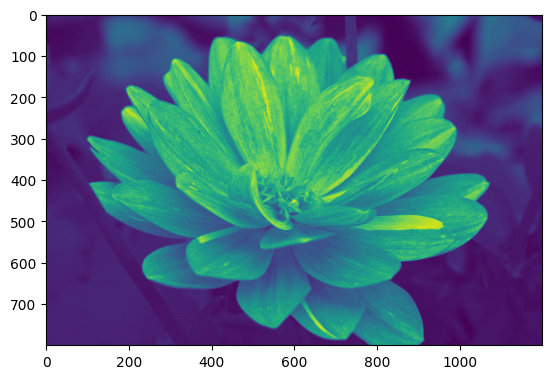

In [17]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

## Вопрос для Quiz

Какого размера картинка img? В ответе запишите общее число пикселей.

In [18]:
img.shape

(800, 1200)

Посмотрим на матрицу изображения

In [19]:
img

array([[16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       ...,
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10]], dtype=uint8)

### Сейчас будем делать PCA

**Задание.** Масштабируйте данные, поделив значения в матрице на 255

In [20]:
img = img / 255

**Задание.** Обучите PCA с 50-ю компонентами. Снизьте размерность.

In [21]:
pca = PCA(n_components=50)
pca.fit(img)

img_reduced = pca.transform(img)
img_reduced

array([[-6.50385082e+00,  9.77155669e-01, -3.31493890e+00, ...,
         2.31376233e-01, -3.55793363e-02,  2.12297577e-01],
       [-6.49767003e+00,  9.63371172e-01, -3.34517663e+00, ...,
         2.31698855e-01, -4.31233605e-02,  2.13276081e-01],
       [-6.48469806e+00,  9.38776550e-01, -3.38259878e+00, ...,
         2.25775201e-01, -4.62025381e-02,  2.17207454e-01],
       ...,
       [-7.62989560e+00,  1.97651200e+00,  1.49473415e+00, ...,
         8.66713973e-02, -2.71660399e-03,  5.39254992e-03],
       [-7.66892621e+00,  1.90829202e+00,  1.46977048e+00, ...,
         3.55245964e-02,  4.99665304e-02, -5.68766321e-02],
       [-7.71692180e+00,  1.83551666e+00,  1.41934789e+00, ...,
        -1.04092574e-02,  8.55527954e-02, -9.68730191e-02]])

## Вопрос для Quiz

Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами. Ответ округлите до сотых.

In [22]:
pca.explained_variance_ratio_.sum()

0.9854898547614955

**Задание.** Нарисуйте график, на котором отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

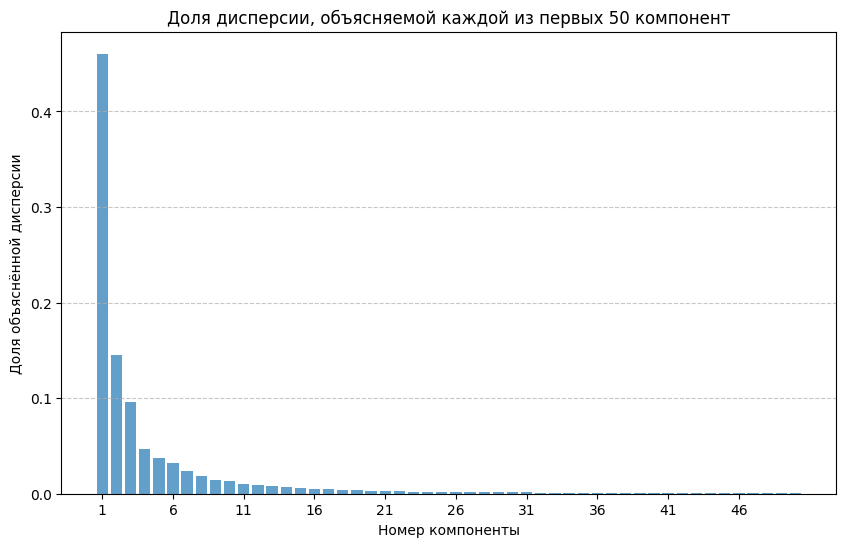

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(range(1, 51), explained_variance_ratio, alpha=0.7, align='center')
plt.title('Доля дисперсии, объясняемой каждой из первых 50 компонент')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объяснённой дисперсии')
plt.xticks(range(1, 51, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Восстанавливаем изображение

**Задание.** Восстановите изображение, используя pca.inverse_transform.

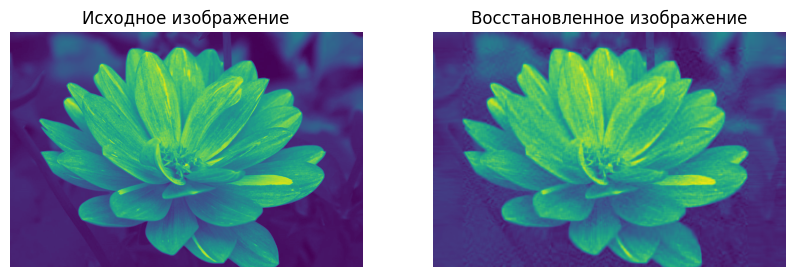

In [26]:
img_reduced_reconcstructed = pca.inverse_transform(img_reduced)

plt.figure(figsize=(10, 5))

# Исходное изображение
plt.subplot(1, 2, 1)
plt.imshow(img.reshape((800, 1200)))
plt.title("Исходное изображение")
plt.axis('off')

# Восстановленное изображение
plt.subplot(1, 2, 2)
plt.imshow(img_reduced_reconcstructed.reshape((800, 1200)))
plt.title("Восстановленное изображение")
plt.axis('off')

plt.show()

**Задание.** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам).

In [ ]:
# Ваш код здесь

## Вопрос для Quiz

Упало ли визуально качество при сжатии изображения до 50 главных компонент?

## Вопрос для Quiz

Подберите минимальное количество компонент, при которых сжатое изображение визуально практически не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

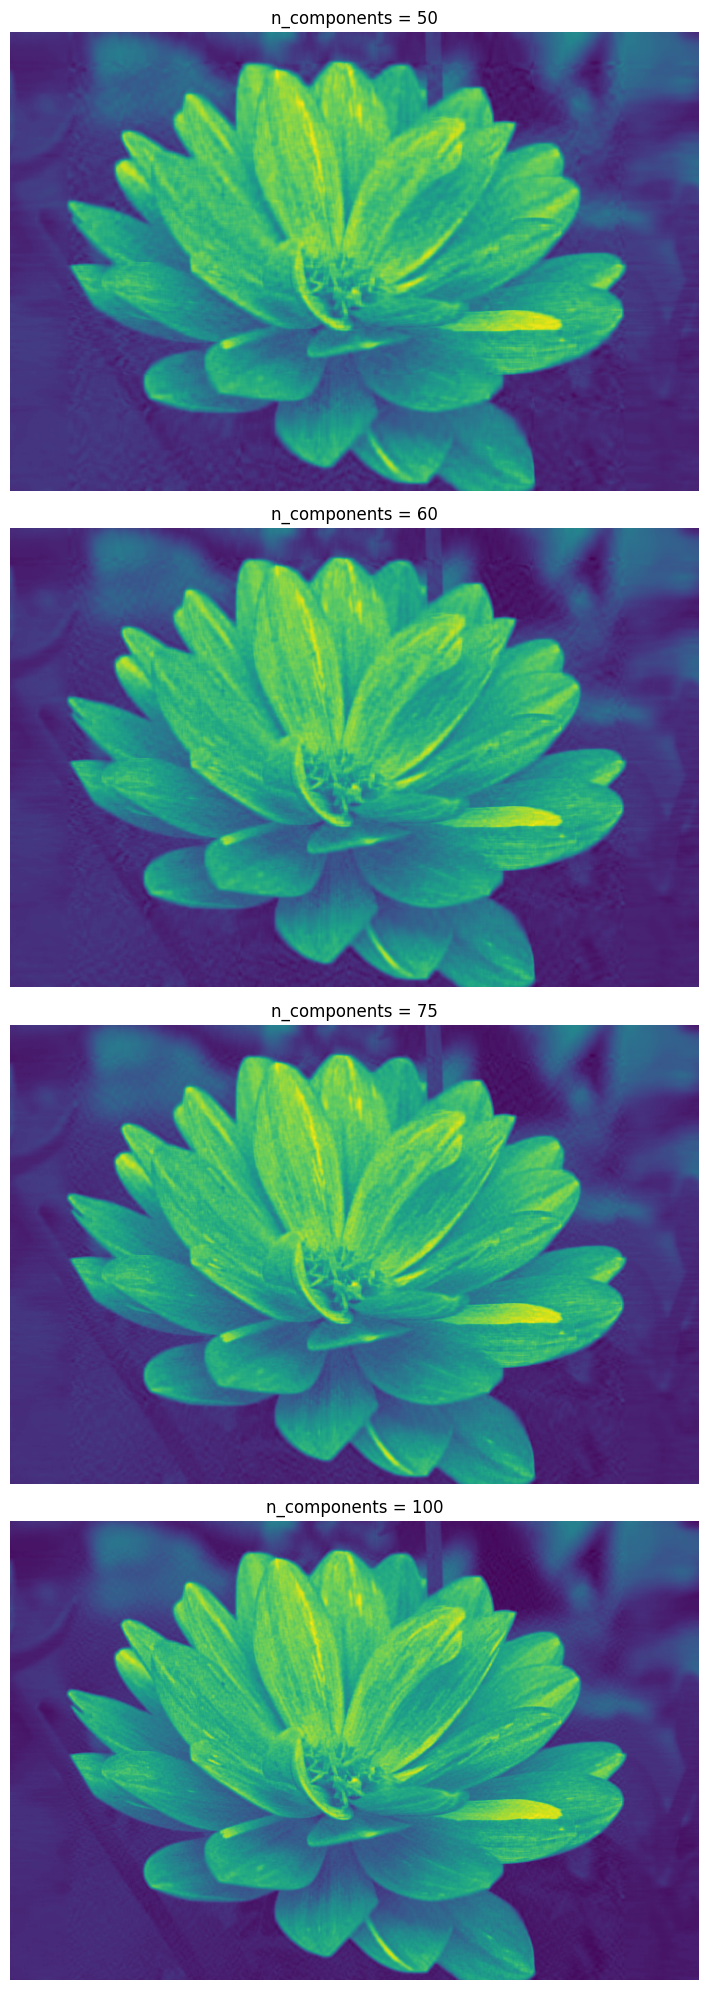

In [29]:
components = [50, 60, 75, 100]
plt.figure(figsize=(10, len(components) * 5))

for i, n in enumerate(components, 1):
    pca = PCA(n_components=n)
    img_reduced = pca.fit_transform(img)
    img_reduced_reconstructed = pca.inverse_transform(img_reduced)

    plt.subplot(len(components), 1, i)
    plt.imshow(img_reduced_reconstructed.reshape((800, 1200)))
    plt.title(f"n_components = {n}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Бонус

Попробуйте проделать все действия ноутбука, но уже с цветным изображением.

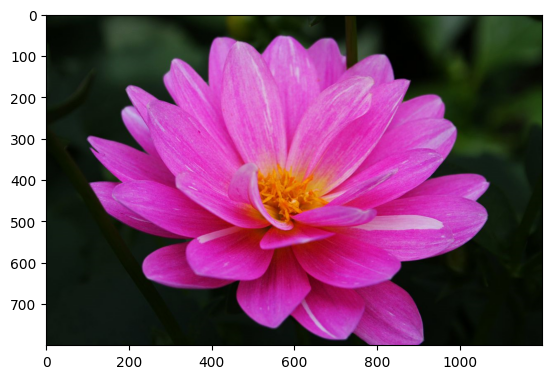

In [ ]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Отличия от предыдущих шагов заключаются в том, что цветное RGB-изображение состоит из трех каналов - это матрица яркостей красного, матрица яркостей зеленого и матрица яркостей синего цветов.

Номер канала - последняя размерность в объекте `img`.
Например, матрица яркости красного - это `img[:,:,0]`.

Все действия выше нужно проделать с каждым каналом в отдельности, а потом объединить преобразованные изображения для каждого канала - чтобы получить итоговую картинку со сниженной размерностью.

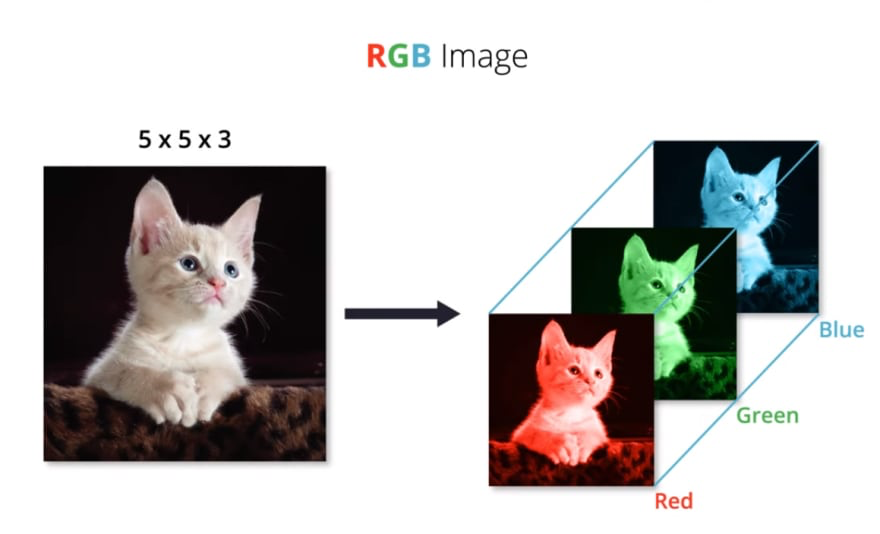

In [ ]:
# ваш код здесь

## Вопрос для Quiz

Найдите любое цветное изображение, которое вам нравится и снизьте его размерность, подберите минимальное число компонент, чтобы визуально не терять качество.

Вы можете снижать размерность для монохромного или для цветного изображения.

Результат - исходное изображение + его размеры, а также изображение после снижения размерности + число компонент.

In [ ]:
# ваш код здесь